# Prediction of amount of gold extracted during the purification process <a class='tocSkip'></a>

This machine learning project is developed for **Zyfra**, a company that develops efficiency solutions for heavy industry.

The model has the objective of predicting the amount of gold extracted from the ore during each stage and at the end of the purification process, in order to optimize production and eliminate unprofitable parameters. The technological process of extraction is summarized in the following figure.

<img src='https://code.s3.yandex.net/new-markets/DS_sprint_10/ES/10.3.2ES.png' width=600/>

The process consists of two steps:

1. **Flotation**: The gold ore mix is fed into flotation plants to obtain a _rougher gold concentrate_ and _rougher tailings_ (ie, product residues with a low concentration of valuable metals). The stability of this process is affected by the volatility and the unfavorable physical-chemical state of the flotation pulp (a mixture of solid particles and liquid).
2. **Purification**: The rougher concentrate undergoes _two purification steps_. After this, we have the final concentrate and the new tails.

We are going to predict the gold concentration after the first, second and final purification stage.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Loading-and-browsing-the-data-" data-toc-modified-id="Loading-and-browsing-the-data--1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading and browsing the data <a id="1,1" rel="nofollow"></a></a></span></li><li><span><a href="#Checking-the-recovery-calculation" data-toc-modified-id="Checking-the-recovery-calculation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking the recovery calculation</a></span></li><li><span><a href="#Analysis-of-unavailable-features-" data-toc-modified-id="Analysis-of-unavailable-features--1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analysis of unavailable features <a id="1.3" rel="nofollow"></a></a></span></li><li><span><a href="#Data-preprocessing-" data-toc-modified-id="Data-preprocessing--1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data preprocessing <a id="1.4" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Data-analysis-" data-toc-modified-id="Data-analysis--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data analysis <a id="2" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-in-each-purification-step-" data-toc-modified-id="Changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-in-each-purification-step--2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Changes in the concentration of metals (Au, Ag, Pb) in each purification step <a id="2.1" rel="nofollow"></a></a></span></li><li><span><a href="#Comparison-of-feed-particles-between-training-and-test-sets-" data-toc-modified-id="Comparison-of-feed-particles-between-training-and-test-sets--2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Comparison of feed particles between training and test sets <a id="2.2" rel="nofollow"></a></a></span></li><li><span><a href="#Total-concentrations-of-all-substances-at-each-stage-" data-toc-modified-id="Total-concentrations-of-all-substances-at-each-stage--2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Total concentrations of all substances at each stage <a id="2.3" rel="nofollow"></a></a></span></li><li><span><a href="#Selection-of-target-variables-and-features-" data-toc-modified-id="Selection-of-target-variables-and-features--2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Selection of target variables and features <a id="2.4" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Model-build-and-train-" data-toc-modified-id="Model-build-and-train--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model build and train <a id="3" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Final-function-definition-sMAPE-" data-toc-modified-id="Final-function-definition-sMAPE--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Final function definition sMAPE <a id="3.1" rel="nofollow"></a></a></span></li><li><span><a href="#Training-models-" data-toc-modified-id="Training-models--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training models <a id="3.2" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Linear-regression-" data-toc-modified-id="Linear-regression--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Linear regression <a id="3.2.1" rel="nofollow"></a></a></span></li><li><span><a href="#Regression-Tree-" data-toc-modified-id="Regression-Tree--3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Regression Tree <a id="3.2.2" rel="nofollow"></a></a></span></li><li><span><a href="#Bosque-aleatoreo-de-regresion-" data-toc-modified-id="Bosque-aleatoreo-de-regresion--3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Bosque aleatoreo de regresion <a id="3.2.3" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Evaluation-of-the-best-model-" data-toc-modified-id="Evaluation-of-the-best-model--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Evaluation of the best model <a id="3.3" rel="nofollow"></a></a></span></li><li><span><a href="#Sanity-test-" data-toc-modified-id="Sanity-test--3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sanity test <a id="4.4" rel="nofollow"></a></a></span></li></ul></li><li><span><a href="#Conclusions-" data-toc-modified-id="Conclusions--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions <a id="4" rel="nofollow"></a></a></span></li></ul></div>

In [1]:
# Load libraries
import pandas as pd                                    # DataFrame manipulation
import numpy as np                                     # Manipulation of numeric arrays
import matplotlib.pyplot as plt                        # Plotting
import seaborn as sns                                  # Plotting
import sidetable as stb                                # Summary tables
from sklearn.metrics import mean_absolute_error        # Mean Absolute Error
from sklearn.preprocessing import StandardScaler       # Scaling numeric variables
from sklearn.linear_model import LinearRegression      # Linear regression
from sklearn.tree import DecisionTreeRegressor         # Decision tree regressor
from sklearn.ensemble import RandomForestRegressor     # Random Forest regressor
from sklearn.model_selection import cross_val_score    # Cross validation
from sklearn.metrics import make_scorer                # Metric definition for model evaluation

# Data preparation

In this first stage of the project we are going to load the data available for the elaboration of the model. The DataFrames with which we are going to work are the following:

* **`au_train`**: training data set
* **`au_test`**: test data set
* **`au_full`**: original data set comprising the training and test set

The DataFrame contains 86 variables of the technological extraction process which comprises 4 stages, each stage can have up to 5 different types of parameters and each type of parameter can take different values corresponding to the technological process variable. In such a way that the nomenclature of the variables takes the following format: `[stage].[parameter_type].[parameter_name]`.

The following figure shows an example of 8 variables, each corresponding to different stages, types of parameters and technological process.

<img src='https://code.s3.yandex.net/new-markets/DS_sprint_10/ES/10.3.2.2ES.png' width=800 />

In the following sub-stages we will develop the following tasks:

1. [Loading and browsing data](#1.1)
3. [Check Recovery Calculation](#1.2)
2. [Analysis of unavailable features](#1.3)
4. [Data Preprocessing](#1.4)

## Loading and browsing the data <a id='1,1' ></a>

Let's load the data and examine the information contained in each DataFrame.

The first column (`date`) of each DataFrame contains the date and time that each variable was measured. When loading the data, we are going to transform this column into a 'datetime' format and set the column as the index of each DataFrame. This will allow us to better manipulate the data and keep only numerical variables for analysis and model training.

In [3]:
# Load data, parse the 'date' column to type datetime and use it as an index

# Training dataset
au_train = pd.read_csv('datasets/gold_recovery_train.csv', parse_dates=[0], infer_datetime_format=True, index_col=0)  

# Test dataset
au_test = pd.read_csv('datasets/gold_recovery_test.csv', parse_dates=[0], infer_datetime_format=True, index_col=0)    

 # Original dataset [train + test]
au_full = pd.read_csv('datasets/gold_recovery_full.csv', parse_dates=[0], infer_datetime_format=True, index_col=0)   

# DataFrame List
data = [au_train, au_test, au_full]

In [4]:
# Información y tamaño de cada DataFrame 
for d in data:
    print(d.info(), d.shape, '\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                     

In [5]:
# Train dataset
au_train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
# Test dataset
au_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
# Full dataset
au_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


The following table summarizes the information of each DataFrame

| DataFrame | No. Columns  | No. Rows  |
|-----------|--------------|-----------|
| au_train  | 86           | 16860     |
| au_test   | 52           |  5856     |
| au_full   | 86           | 22716     |


Both **`au_train`** and **`au_full`** have 86 columns, the test suite **`au_test`** has only 52 columns. Some parameters are not available because they were measured or calculated much later. Therefore, some of the features that are present in the training set may be absent in the test set.

Without exception, each DataFrame has missing values in more than one column. Missing values will be handle later.

## Checking the recovery calculation

Let's check that the payback calculation after floatation is correct. For this purpose we are going to calculate the recovery of the `rougher.output.recovery` feature using the training set.

The formula for calculating recovery the following:

$$Recovery = \frac{C·(F-T)}{F·(C-T} · 100$$

Where:
* `C`: gold proportion in concentrate just after flotation    - `rougher.output.concentrate_au`
* `F`: gold proportion in feed before flotation               - `rougher.input.feed_au`
* `T`: gold proportion in rougher tails just after flotation  - `rougher.output.tail_au`

In order to have a metric of what is observed in the data set and what is calculated, the Mean Absolute Error (MEA) will be calculated between the calculations and the values of the characteristic. The MEA is calculated with the following formula:

$$EAM = \frac{1}{N} \sum_{1=1}^{N}|y_i - \hat{y_i}|$$

Where:
* $y_i$: is the value of the observation with the serial number _i_
* $\hat{y_i}$: is the predicted value or in this case, calculated for the observation with serial number _i_
* $N$: is the number of errors in the sample
* $\sum_{i=1}^{N}$: is the sum of all the observations in the sample (_i_ varies in the range from 1 to _N_).

Due to the presence of missing values in the training set, before proceeding to do the MAE recovery calculations, we are going to make a subset of the columns of interest and save them in the DataFrame **`au_recovery`** and later delete the missing values.

In [8]:
# Subset of columns of interest to calculate recovery after flotation
au_recovery = au_train.loc[:,['rougher.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au', 'rougher.output.recovery']]

# Drop rows with NaNs
au_recovery.dropna(inplace=True)

# DataFrame au_recovery info
au_recovery.info()

# Head au_recovery
au_recovery.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14287 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   rougher.output.concentrate_au  14287 non-null  float64
 1   rougher.input.feed_au          14287 non-null  float64
 2   rougher.output.tail_au         14287 non-null  float64
 3   rougher.output.recovery        14287 non-null  float64
dtypes: float64(4)
memory usage: 558.1 KB


,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
date,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308
2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430
2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794


We have selected the columns of interest to perform the recovery calculation after the flotation process and the rows with missing values have been eliminated. The information has been saved in the DataFrame `au_recovery` which consists of 4 columns and 14,287 rows.

Now we are going to add a row to calculate the recovery according to the mentioned formula and store the values in `rougher.output.recovery_calc`. For this we are going to define the `recovery` formula and apply it on the DataFrame.

In [9]:
# Define formula for recovery calculation
def recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    return ((C * (F - T)) / ((F * (C - T)))) * 100

In [10]:
# Calculate recovery and save it in the column 'rougher.output.recovery_calc'
au_recovery['rougher.output.recovery_calc'] = au_recovery.apply(recovery, axis=1)

# Head au_recovery
au_recovery.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,rougher.output.recovery_calc
date,,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308
2016-01-15 03:00:00,19.320810,6.118189,1.079755,87.226430,87.226430
2016-01-15 04:00:00,19.216101,5.663707,1.012642,86.688794,86.688794


We have calculated the recovery after the float and it has been stored in the `rougher.output.recovery_calc` column. When observing the first 5 rows of the DataFrame, it is observed that the values are identical. However we will calculate if there are errors using the MAE. For this we are going to use the `mean_absolute_error` function from the `sklearn.metrics` module.

In [11]:
# Mean Absolute Error
print(mean_absolute_error(au_recovery['rougher.output.recovery'], au_recovery['rougher.output.recovery_calc']))

9.303415616264301e-15


The MAE is very small so we can be sure that the values presented in the data sets are reliable.

## Analysis of unavailable features <a id='1.3' ></a>

The training and test sets do not have the same number of features (i.e. columns). While the `au_train` training set consists of 86 features, the `au_test` test set has only 52, that is, 34 fewer features.

We are going to identify which characteristics of the training set are not in the test set and analyze to which stage of the technological process they belong.

In [13]:
# List of features
train_cols = au_train.columns.tolist()
test_cols = au_test.columns.tolist()

# Get list of columns that are in the training set but not in the test set
diff_cols = np.setdiff1d(train_cols, test_cols).tolist() 

print('Number of columns not shared:', len(diff_cols),'\n')

for c in sorted(diff_cols):
    print(c)

Number of columns not shared: 34 

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleane

The missing features in the test set belong to the following processes:

|    Process     | Parameter type    | Number of features |
|----------------|-------------------|--------------------|
| Rougher        | Calculation       | 4                  |
| Rougher        | Output            | 9                  |
| Primary clean  | Output            | 8                  |
| Secondary clean| Output            | 4                  |
| Final clean    | Output            | 9                  |

With the exception of the `rougher.output.recovery` and `final.output.recovery` columns, which are the target variables, later we will remove the columns that the training set does not share with the test set. In the next section we will discuss the missing values in each data set.

Before purging the missing values, we are going to remove the features (columns) that the training set does not share with the test set except for the `rougher.output.recovery` and `final.output.recovery` columns.

## Data preprocessing <a id='1.4'></a>

In this section we will discuss the missing values for each data set. Because the features are values measured in a sequence of time, missing values cannot be imputed using measures of centrality such as the mean or median. Because the values are taken within one hour on each measurement day, it is possible to use the _"forward filling"_ technique since the measurements between one hour and another are usually similar.

First we are going to analyze the number of missing values in each data set using tally tables and the relative percentage that the missing values represent in each characteristic.

In [14]:
# Valores ausentes conjunto de entrenamiento
au_train.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,"2,573","16,860",15.26%
rougher.output.tail_ag,"2,250","16,860",13.35%
rougher.output.tail_sol,"2,249","16,860",13.34%
rougher.output.tail_au,"2,249","16,860",13.34%
secondary_cleaner.output.tail_sol,"1,986","16,860",11.78%
rougher.input.floatbank11_xanthate,"1,904","16,860",11.29%
final.output.recovery,"1,521","16,860",9.02%
primary_cleaner.input.sulfate,"1,307","16,860",7.75%
primary_cleaner.input.depressant,"1,262","16,860",7.49%
rougher.calculation.au_pb_ratio,"1,242","16,860",7.37%


In [15]:
# # Valores ausentes conjunto de prueba
au_test.stb.missing(style=True)

,missing,total,percent
rougher.input.floatbank11_xanthate,353,"5,856",6.03%
primary_cleaner.input.sulfate,302,"5,856",5.16%
primary_cleaner.input.depressant,284,"5,856",4.85%
rougher.input.floatbank10_sulfate,257,"5,856",4.39%
primary_cleaner.input.xanthate,166,"5,856",2.83%
rougher.input.floatbank10_xanthate,123,"5,856",2.10%
rougher.input.feed_sol,67,"5,856",1.14%
rougher.input.floatbank11_sulfate,55,"5,856",0.94%
rougher.input.feed_rate,40,"5,856",0.68%
secondary_cleaner.state.floatbank3_a_air,34,"5,856",0.58%


In [16]:
# Valores ausentes conjunto original
au_full.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,"3,119","22,716",13.73%
rougher.output.tail_ag,"2,737","22,716",12.05%
rougher.output.tail_sol,"2,736","22,716",12.04%
rougher.output.tail_au,"2,736","22,716",12.04%
rougher.input.floatbank11_xanthate,"2,257","22,716",9.94%
secondary_cleaner.output.tail_sol,"2,215","22,716",9.75%
final.output.recovery,"1,963","22,716",8.64%
rougher.calculation.au_pb_ratio,"1,627","22,716",7.16%
primary_cleaner.input.sulfate,"1,609","22,716",7.08%
primary_cleaner.input.depressant,"1,546","22,716",6.81%


All columns except `primary_cleaner.input.feed_size` have missing values. The percentage of missing values with respect to the total row in each column reaches up to 15.26% in the training set.

We are going to proceed to **eliminate the missing values**. Although the values can be replaced with the 'forward filling' method, since the data show consecutive values at sampling points separated by one hour intervals, some variables have missing values for more than one consecutive hour, so this is discarded. method. Also, a previous version of this project showed that model quality decreases when treating missing values with 'forward filling'.

The data sets without missing values will be stored in the following DataFrames **`au_train_ff`**, **`au_test_ff`** and **`au_full_ff`** corresponding to the training, test and original sets respectively.

In [17]:
# Reemplazo de valores ausentes con el método forward filling
#au_train_ff = au_train.fillna(method='ffill', axis=0) 
#au_test_ff = au_test.fillna(method='ffill', axis=0)
#au_full_ff = au_full.fillna(method='ffill', axis=0)

au_train_ff = au_train.dropna() 
au_test_ff = au_test.dropna()
au_full_ff = au_full.dropna()

Now we are going to check that there are no missing values in our new sets.

In [18]:
# Check for null values using missing with the argument clip_0=True
# only columns with NA's will be displayed

print(au_train_ff.stb.missing(clip_0=True),'\n')
print(au_test_ff.stb.missing(clip_0=True),'\n')
print(au_full_ff.stb.missing(clip_0=True),'\n')

Empty DataFrame
Columns: [missing, total, percent]
Index: [] 

Empty DataFrame
Columns: [missing, total, percent]
Index: [] 

Empty DataFrame
Columns: [missing, total, percent]
Index: [] 



We have concluded this stage of the project by creating three new DataFrames without missing values which will be used in later stages.

# Data analysis <a id='2'></a>

In this second stage we are going to analyze the data with the following objectives.

1. [Observe how the concentration of metals (Au, Ag, Pb) changes depending on the purification stage](#2.1)
2. [Compare the particle size distributions of the feed in the training set and the test set](#2.2)
3. [Total concentrations of all substances in the different stages of the technological process](#2.3)
4. [Selection of objective variables and characteristics](#2.4)

## Changes in the concentration of metals (Au, Ag, Pb) in each purification step <a id='2.1'></a>

We are going to analyze how the concentrations of gold (Au), silver (Ag) and lead (Pb) change during each stage of the purification process (i.e. flotation, primary purification, secondary purification).

The change in concentration at each stage will be performed using histograms. To plot the concentrations of each metal, only the original data set with no missing values **`au_full_ff`** will be used.

In [19]:
# Au - Gold concentration
# Selection of variables to graph
au_concentration = au_full_ff[['rougher.input.feed_au','rougher.output.concentrate_au', 
                               'primary_cleaner.output.concentrate_au','final.output.concentrate_au']]

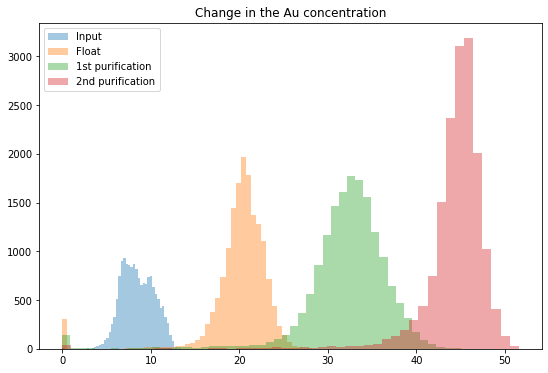

In [23]:
# Plot Au concentration
plt.figure(figsize=(9,6))
plt.hist(au_concentration['rougher.input.feed_au'], bins=50, alpha=0.4, label = 'Input')
plt.hist(au_concentration['rougher.output.concentrate_au'], bins=50, alpha=0.4, label = 'Float')
plt.hist(au_concentration['primary_cleaner.output.concentrate_au'], bins=50, alpha=0.4, label = '1st purification')
plt.hist(au_concentration['final.output.concentrate_au'], bins=50, alpha=0.4, label = '2nd purification')
plt.legend(loc='upper left')
plt.title('Change in the Au concentration')
plt.show()

In general, the Au concentration increases as each purification step progresses. However, at each stage zero values are displayed.

In [21]:
# Ag concentration
# Selection of variables
ag_concentration = au_full_ff[['rougher.input.feed_ag','rougher.output.concentrate_ag', 
                               'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]

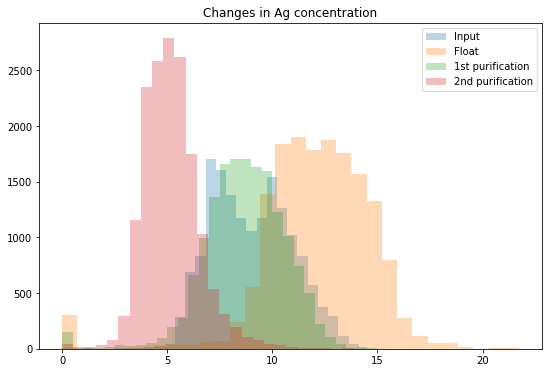

In [24]:
# Plot Ag concentration
plt.figure(figsize=(9,6))
plt.hist(ag_concentration['rougher.input.feed_ag'], bins=30, alpha=0.3, label = 'Input')
plt.hist(ag_concentration['rougher.output.concentrate_ag'], bins=30, alpha=0.3, label = 'Float')
plt.hist(ag_concentration['primary_cleaner.output.concentrate_ag'], bins=30, alpha=0.3, label = '1st purification')
plt.hist(ag_concentration['final.output.concentrate_ag'], bins=30, alpha=0.3, label = '2nd purification')
plt.legend(loc='upper right')
plt.title('Changes in Ag concentration')
plt.show()

With the exception of the 'input' stage, the Ag concentration decreases in each subsequent purification stage. As in the case of Au, there are some zero values at each stage.

In [25]:
# Pb concentration - led
# Selection of variables
pb_concentration = au_full_ff[['rougher.input.feed_pb','rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb',
                               'final.output.concentrate_pb']]

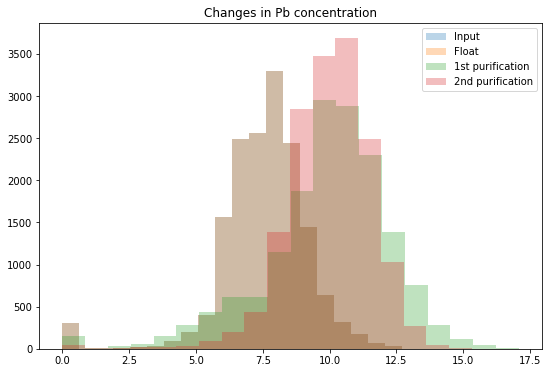

In [26]:
# Plot Pb concentration
plt.figure(figsize=(9,6))
plt.hist(pb_concentration['rougher.output.concentrate_pb'], bins=20, alpha=0.3, label = 'Input')
plt.hist(pb_concentration['rougher.output.concentrate_pb'], bins=20, alpha=0.3, label = 'Float')
plt.hist(pb_concentration['primary_cleaner.output.concentrate_pb'], bins=20, alpha=0.3, label = '1st purification')
plt.hist(pb_concentration['final.output.concentrate_pb'], bins=20, alpha=0.3, label = '2nd purification')
plt.legend(loc='upper right')
plt.title('Changes in Pb concentration')
plt.show()

The concentration of lead is highly variable and the distribution of the concentrations of this metal overlap between each purification stage without showing an evident pattern as in the case of Au or Ag. As in the previous cases, there are some zero values.

## Comparison of feed particles between training and test sets <a id='2.2'></a>

In this substep, we are going to compare the feed particle size distribution (`rougher.input.feed_size`) between the training and test sets. If the distributions vary significantly, the model evaluation will not be correct. We are going to use the DataFrames without missing values corresponding to each data set. The comparison in the particle size distribution in each data set will be done visually using histograms.

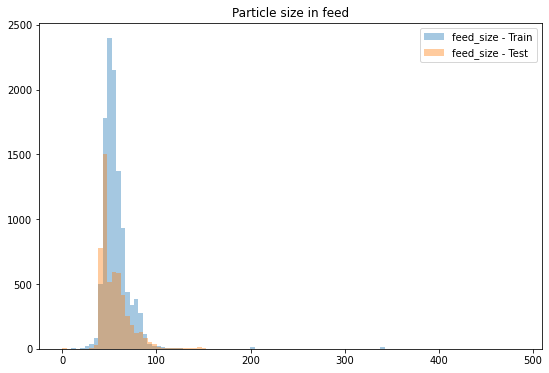

In [27]:
# Comparison of particle size distributions of train vs. test feed
plt.figure(figsize=(9,6))
plt.hist(au_train_ff['rougher.input.feed_size'], bins=100, alpha=0.4, label='feed_size - Train')
plt.hist(au_test_ff['rougher.input.feed_size'], bins=100, alpha=0.4, label='feed_size - Test')
plt.legend(loc='upper right')
plt.title('Particle size in feed')
plt.show()

The distributions overlap, the height of the bars differing due to the size of each set. We can consider that the size distribution of the feed particles is similar between the training and test sets.

## Total concentrations of all substances at each stage <a id='2.3'></a>

We are going to consider the total concentrations of all substances ('Au', 'Ag', 'Pb' and 'Sol') in the different stages: raw material (`rougher.input.feed_`), rougher concentrate (`rougher. output.concentrate_`) and final concentrate (`final.output.concentrate_`). In case of observing abnormal values in the total distribution, such values will be eliminated.

For this purpose we are going to add all the concentrations of all the substances in a single variable in each purification stage. Then, you'll look at the distribution of concentrations using histograms and combined boxplots. The data set to be used will be the original without missing values (**`au_full_ff`**).

In [28]:
# Variable selection

# Substances - Raw input
input_sustances = au_full_ff.loc[:,['rougher.input.feed_ag','rougher.input.feed_pb',
                            'rougher.input.feed_sol','rougher.input.feed_au']]

# Get mix concentration - Raw input
input_sustances['input_mix'] = input_sustances[list(input_sustances)].sum(axis=1)

# Substances - Concentrate Rougher
rougher_sustances = au_full_ff.loc[:,['rougher.output.concentrate_ag','rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol','rougher.output.concentrate_au']]

# Get mix concentration - Rougher
rougher_sustances['rougher_mix'] = rougher_sustances[list(rougher_sustances)].sum(axis=1)

# Substances - Final concentrate
output_sustances = au_full_ff.loc[:,['final.output.concentrate_ag','final.output.concentrate_pb',
                              'final.output.concentrate_sol','final.output.concentrate_au']]

# Get mix concentration - Final
output_sustances['output_mix'] = output_sustances[list(output_sustances)].sum(axis=1)

Three new DataFrames have been created for the steps of interest in the purification process: `input_substances`, `rougher_sustacnes` and `output_substances` that contain the Au, Ag, Pb and Sol concentrations in the raw material input, flotation and final concentrate (or output - output), respectively. Each DataFrame has a column with the sum of the concentrations (`_mix`) at each step.

We now proceed to graph the sum of the concentrations.

In [29]:
# Ignore warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

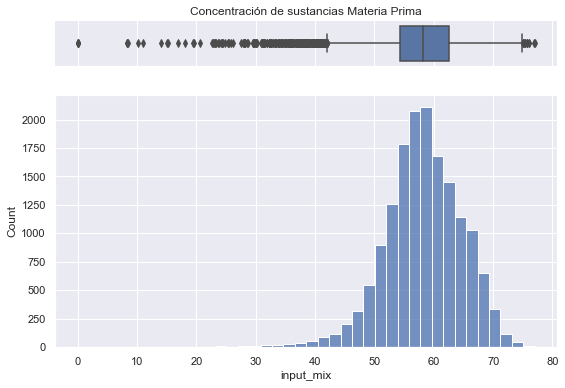

In [30]:
# Input substances - Input
sns.set(style='ticks')
sns.set(rc={"figure.figsize":(9, 6)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(input_sustances['input_mix'], ax=ax_box)
sns.histplot(data=input_sustances, x="input_mix", bins= 40, ax=ax_hist)
ax_box.set(xlabel='')
ax_box.set(title='Concentration of substances Raw material')
ax_box.set(yticks=[])
sns.despine(ax=ax_box, left=True)
plt.show()

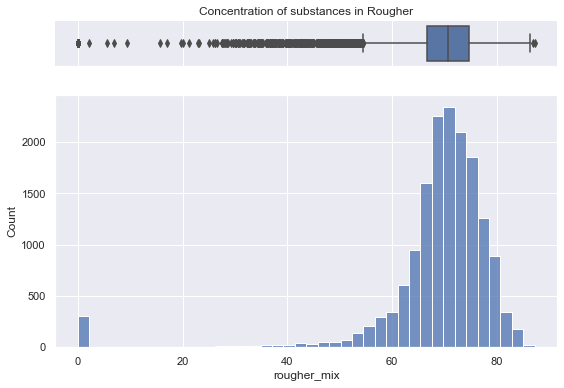

In [32]:
# Rougher
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(rougher_sustances['rougher_mix'], ax=ax_box)
sns.histplot(data=rougher_sustances, x="rougher_mix", bins= 40, ax=ax_hist)
ax_box.set(xlabel='')
ax_box.set(title='Concentration of substances in Rougher')
ax_box.set(yticks=[])
sns.despine(ax=ax_box, left=True)
plt.show()

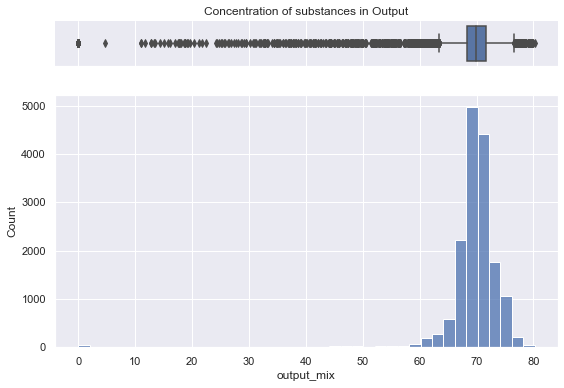

In [33]:
# Ouput
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(output_sustances['output_mix'], ax=ax_box)
sns.histplot(data=output_sustances, x="output_mix", bins= 40, ax=ax_hist)
ax_box.set(xlabel='')
ax_box.set(title='Concentration of substances in Output')
ax_box.set(yticks=[])
sns.despine(ax=ax_box, left=True)
plt.show()

In the combined graphs, it can be seen that in all the stages there are concentrations with a value of zero which constitute the outliers. We are going to discard the cases less than or equal to zero and keep only the values greater than zero in the training set, the filtered data is going to be saved in the DataFrame **`au_train_fff`** that represents the training set without missing values and filtered.

In [34]:
# Filtering of values greater than zero in the input, rougher and final stages

# Columns - Raw material - Input
input_cols = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_sol','rougher.input.feed_au']

# Columns - Rougher
rougher_cols = ['rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au']

# Columns - Output
output_cols = ['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au']

# Filtering columns greater than zero at each stage
au_train_fff = au_train_ff[(au_train_ff[input_cols].sum(axis=1) > 0) &
                          (au_train_ff[rougher_cols].sum(axis=1)> 0) &
                          (au_train_ff[output_cols].sum(axis=1) > 0)]

print('Base size before filtering:  ', au_train_ff.shape)
print('Base size after filtering:', au_train_fff.shape)
print('Difference between bases:', au_train_ff.shape[0] - au_train_fff.shape[0], 'casos')
print('Discarded percentage:', (1 - (au_train_fff.shape[0]/au_train_ff.shape[0]))*100,'%')

Base size before filtering:   (11017, 86)
Base size after filtering: (10784, 86)
Difference between bases: 233 casos
Discarded percentage: 2.1149133157846944 %


After filtering the databases, 233 cases have been discarded, representing ~2% of the original training set. Now we are going to select the target variables and features before training each model.

## Selection of target variables and features <a id='2.4'></a>

So far we have manipulated the data sets in terms of replacing missing values and filtering out values greater than zero in the concentrates of the substances at three different stages.

In this section we are going to select the objective variables and characteristics that will be used to train the model. The variables that are sought to be predicted (i.e. objective) are:
* Rougher concentrate recovery `rougher.output.recovery`
* The final recovery of the concentrate `final.output.recovery`

These variables are found in the training set so we are simply going to select them and store them in the **`train_target`** DataFrame, the data will be obtained from the **`au_train_fff`** DataFrame.

The test set **`au_test_ff`** lacks these target variables so it is necessary to add these two columns to the test set using a 'merge' with the original data set and using the index of both tables (date and time) as the union argument. Once the target variables have been added, the target variables will be separated from the test set in the DataFrame **`test_target`**.

In [35]:
# Selection of training set target variables
train_target = au_train_fff[['rougher.output.recovery', 'final.output.recovery']]

# Complement test set with target variables
au_test_ff = au_test_ff.merge(au_full_ff[['rougher.output.recovery', 'final.output.recovery']], 
                              left_index=True, right_index=True, how='left')

print(au_test_ff.shape,'\n')

# Selection of test set target variables
test_target = au_test_ff[['rougher.output.recovery', 'final.output.recovery']]

# size of target sets
print('Train target:', train_target.shape)
print('Test target:', test_target.shape)

(5383, 54) 

Train target: (10784, 2)
Test target: (5383, 2)


We have selected the target variables for the training and test sets.

Now we are going to select the characteristic variables with which the model is going to be trained. As already seen in previous sections, the training and test sets do not have the same number of features. To select the characteristics, we are going to select only the columns that do share the two data sets. The features of the training set will be stored in the DataFrame **`train_features`** and those of the test set in the DataFrame **`test_features`**.

In [36]:
# Selection of test set features
test_features = au_test_ff.iloc[:, 0:-2] # Select from the first column to the penultimate column

# Selection of features for the training set
train_features = au_train_fff.loc[:, test_features.columns.tolist()] # Select same columns in test_features

# Size of feature sets
print('Train features:', train_features.shape)
print('Test features:', test_features.shape)

Train features: (10784, 52)
Test features: (5383, 52)


We have selected the features for the two data sets according to the variables available in the test set.

With these subsets of data we can start working on our predictive model.

# Model build and train <a id='3'></a>

In this third stage we are going to build our model. But first we are going to define a metric to evaluate the model which is called **sMAPE** or Symmetrical Mean Absolute Percentage Error, which is calculated with the following formula.

$$sMAPE = \frac{1}{N} \sum_{i=1}^{N} \frac{|y_i - \hat{y_i}|}{(|y_i|+|\hat{y_i}|)/2}·100\%$$

Where:
* $y_i$: Value of the objective for the observation with the index _i_ in the set used to measure quality.
* $\hat{y_i}$: Prediction value for the observation with index _i_, for example, in the test sample.
* $N$: Number of observations in the sample
* $\sum_{i=1}^{N}$: Sum of all the observations in the sample (_i_ takes values from 1 to N).

We remember that we need to predict two values:
* Rougher concentrate recovery `rougher.output.recovery`
* The final recovery of the concentrate `final.output.recovery`

The final metric includes the two values:

$$sMAPE_{final} = 25\% · sMAPE(rougher) + 75\% · sMAPE(final)$$

So first we are going to define a function to calculate the **sMAPE**. The tasks to be carried out in this section are the following:

1. [Final sMAPE function definition](#3.1)
2. [Model Training](#3.2)
3. [Evaluation of the best model](#3.3)

## Final function definition sMAPE <a id='3.1'></a>

Let's define the function final_smape according to the formula described above. This formula will be used for the subsequent evaluation of the built prediction models. Because this function expresses the error as a percentage, it takes values between 0 and 100. The lower the value of sMAPE, the better the predictive quality of the model.

To use the sMAPE metric in the model evaluation code, we are going to create a new metric **`sMAPE_score`** using the `sklearn.metrics` function **`make_secorer`** whose documentation can be found in the following link [make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html)

In [37]:
# Function final_sMAPE
def final_smape(target, prediction):
    
    # Define internal function sMAPE
    def smape(target, prediction):
        smape = np.mean((np.abs(target - prediction)/((np.abs(target)+np.abs(prediction))/2))) * 100
        return smape
    
    # Smape calculation for Rougher[0] and Final[1]
    smape_rougher = smape(target.iloc[:,0], prediction[:,0]) # Choose the first column of target and predictions -> rougher
    smape_final   = smape(target.iloc[:,1], prediction[:,1]) # Choose the second column of target and predictions -> final
    final_smape   = (.25 * smape_rougher) + (0.75 * smape_final)
    
    return final_smape

# Define a new metric to be used in the models
sMAPE_score = make_scorer(final_smape, greater_is_better = False)

We have defined the formula to calculate the **final sMAPE**, this metric will help us to evaluate the models that we are going to build.

## Training models <a id='3.2'></a>

In this section we are going to train different models for the prediction of two numerical variables. Since our target variables are numeric, we are going to use regression models:

1. [Linear Regression](#3.2.1)
2. [Logistic Regression Tree](#3.2.2)
2. [Random Regression Forest](#3.2.3)

All models will be evaluated applying **cross validation** with five blocks. Finally, the best model will be chosen according to its final sMAPE value evaluated with the test set.

Before proceeding with the training of the models we will process the features. Because they are numerical variables, some variables can have a very wide range and variance which can be misinterpreted variables with a very high weight. To avoid this bias, we are going to standardize features across all feature sets.

In [38]:
# Feature list
features_list = test_features.columns.tolist()

# Scale numeric features
scaler = StandardScaler()
scaler.fit(train_features)

# Scaling training set features
train_features[features_list] = scaler.transform(train_features[features_list])

# Scaling test set features
test_features[features_list] = scaler.transform(test_features[features_list])

/var/folders/v0/c_8h_x9j5qg56vbq_r6d7vvw0000gn/T/ipykernel_26426/119388462.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[features_list] = scaler.transform(test_features[features_list])


In [39]:
# Viz train_features
train_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-0.382058,0.237703,-0.259711,0.260955,-0.431936,-0.302141,-0.429902,-0.805456,-0.420035,-0.278751,...,-0.958081,-0.495814,-0.548503,-0.792878,-1.120725,-0.404675,-0.799404,-0.445225,-1.083913,-2.445982
2016-01-15 01:00:00,-0.422672,0.287310,-0.259711,0.299002,-0.231628,-0.359907,-0.245857,-0.323211,-0.227305,-0.297249,...,-0.962498,-0.552793,-0.576150,-0.736641,-1.101298,-0.450204,-0.815554,-0.447901,-1.111389,-2.293625
2016-01-15 02:00:00,-0.472910,0.588583,-0.259711,0.267813,-0.038920,-0.333610,-0.062415,-0.344845,-0.035394,-0.341603,...,-0.958409,-0.496435,-0.583135,-0.733349,-1.095883,-0.449204,-0.810599,-0.446346,-1.105946,-2.334897
2016-01-15 03:00:00,-0.515935,0.590314,-0.259711,0.282791,-0.050969,-0.361264,-0.060369,-0.317706,-0.047933,-0.337551,...,-0.954542,-0.464999,-0.567079,-0.734351,-1.113076,-0.426498,-0.816819,-0.440049,-1.110096,-2.298883
2016-01-15 04:00:00,-0.634826,0.765010,-0.259711,0.318722,-0.040563,-0.303976,-0.054524,-0.336548,-0.053262,-0.342119,...,-0.956199,-0.445749,-0.575680,-0.732028,-1.120712,-0.487336,-0.830957,-0.442458,-1.111696,-2.336642


In [40]:
# Viz test features
test_features.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,1.942120,1.674564,1.178290,0.305456,-1.576475,-0.340213,-1.573139,-0.324782,-1.525127,-0.336877,...,-1.316636,-0.407146,-1.304113,-0.735937,-1.459133,1.210902,-1.345162,-0.434790,1.170879,0.224636
2016-09-01 01:59:59,2.069604,1.672896,1.178290,0.265635,-1.578019,-0.335339,-1.581319,-0.320654,-1.554287,-0.295112,...,-1.310414,-0.424152,-1.282958,-0.708438,-1.457131,-1.078630,-1.344084,-0.437797,0.868083,0.221867
2016-09-01 02:59:59,2.065925,1.051896,0.670081,0.280887,-1.580176,-0.358846,-1.575275,-0.320256,-1.540086,-0.378155,...,-1.327642,-0.425508,-1.289265,-0.728265,-1.437846,-0.465669,-1.339612,-0.429762,0.863579,0.201658
2016-09-01 03:59:59,2.068043,0.792535,0.415976,-0.081771,-1.571641,-0.300733,-1.585937,-0.304115,-1.524933,-0.269888,...,-1.314920,-0.417636,-1.293327,-0.705783,-1.467593,-0.467305,-1.335141,-0.433014,0.855328,0.249785
2016-09-01 04:59:59,1.617225,0.401400,0.225398,-0.240319,-1.559118,-0.357105,-1.580767,-0.312674,-1.509859,-0.339907,...,-1.316310,-0.463661,-1.297077,-0.721121,-1.431547,-0.679269,-1.330670,-0.442554,0.865100,0.195776


We have standardized the characteristics of the training and test sets, now we can proceed to build and evaluate the models.

### Linear regression <a id='3.2.1'></a>

This is the simplest regression model, in this model we are not going to modify any hyperparameter. The cross validation of the model will be with 5 blocks and the sMAPE_score will be used as the evaluation metric.

In [41]:
# Linear regression

lr_model = LinearRegression()

# Cross-validate model training using 5 blocks, and evaluated by sMAPE_score
lr_score = cross_val_score(lr_model, train_features, train_target, scoring=sMAPE_score, cv=5)

print('Final average sMAPE score:', np.abs(lr_score.mean()))

Final average sMAPE score: 8.31857117948264


Our logistic regression model returned an average final **sMAPE of 8.318%**.

### Regression Tree <a id='3.2.2'></a>

The regression tree model will be built by iterating the `max_depth` hyperparameter which determines the maximum depth of the tree. The optimal depth will be determined according to the sMAPE_score calculated by cross validation using 5 blocks.

In [42]:
# Arbol de regresion
for depth in range(1,11):
    ar_model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    ar_score = cross_val_score(ar_model, train_features, train_target, scoring=sMAPE_score, cv=5)
    print('Max depth:', depth, '- Average sMAPE score:', np.abs(ar_score.mean()))

Max depth: 1 - Average sMAPE score: 7.786185888630311
Max depth: 2 - Average sMAPE score: 7.986053584112564
Max depth: 3 - Average sMAPE score: 8.624702959276174
Max depth: 4 - Average sMAPE score: 8.70463430723826
Max depth: 5 - Average sMAPE score: 8.977183471570196
Max depth: 6 - Average sMAPE score: 9.151398701662595
Max depth: 7 - Average sMAPE score: 9.702120824948294
Max depth: 8 - Average sMAPE score: 10.715489158790819
Max depth: 9 - Average sMAPE score: 12.139797694995133
Max depth: 10 - Average sMAPE score: 12.116110844076747


The tree with the lowest score had a **depth of 1** and an average final **sMAPE of 7.785%**.

### Random regression forest <a id='3.2.3'></a>

Finally we are going to build a random regression forest model, for which we are going to look for the best combination between the number of estimators (`n_estimators`) and the maximum depth of each tree (`max_depth`). We are going to iterate the number of estimators between 10 and 50 with a step of 10, that is, (10, 20, 30, 40 and 50), the maximum depth is going to iterate from 1 to 10.

**Note**: The code where the iteration is done is not executed due to the time it takes to iterate each parameter and cross-validate. The best model selected according to the iteration is presented as executable code.

In [39]:
#best_bar = None
#best_bar_score = 100
#best_est = 0
#best_depth = 0
#
## Iteration with different estimators and depths, this can take a while so go grab a coffee
#for est in range(10, 51, 10):
#    for depth in range(1,11):
#        bar_model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=12345)
#        bar_score = cross_val_score(bar_model, train_features, train_target, scoring=sMAPE_score, cv=5)
#        bar_score_mean = np.abs(bar_score.mean())
#        if bar_score_mean < best_bar_score:
#            best_model = bar_model
#            best_bar_score = bar_score_mean
#            best_est = est
#            best_depth = depth
#
#print('Best averge sMAPE:', best_bar_score, '| n_estimators:', best_est, '| max_depth:', best_depth)

In [43]:
bar_model = RandomForestRegressor(n_estimators=20, max_depth=1, random_state=12345)
bar_score = cross_val_score(bar_model, train_features, train_target, scoring=sMAPE_score, cv=5)
print('Final average sMAPE score:', np.abs(bar_score.mean()))

Final average sMAPE score: 7.737109525818532


The best regression random forest model had an average final **sMAPE score of: 7.737%, a number of estimators of 20, and a maximum depth of 1**.

Below are the models and their average final sMAPE score for each model:

| Model                  | sMAPE final | Parameters       |
|------------------------|-------------|------------------|
|Linear regression       | 8.318       | NA               |
|Regression tree         | 7.786       | max_depth = 1    |
|Random forest regressor | 7.737       | max_depth = 1, n_estimators = 20| 

The **regression random forest model was the model with the lowest sMAPE score** so we are going to use this model to test the model with the test set and perform a sanity test.

## Evaluation of the best model <a id='3.3'></a>

Let's evaluate our random forest regression model with the test set.

In [44]:
final_model = RandomForestRegressor(n_estimators=20, max_depth=1, random_state=12345)
final_model.fit(train_features, train_target)
predictions = final_model.predict(test_features)
smape_final = final_smape(test_target, predictions)
print('Score sMAPE final:', smape_final)

Score sMAPE final: 8.303884834839526


Our model obtains a final **sMAPE score of 8.303%** which means that the predictions for rougher and final concentrate recovery deviate ~8% from the true value. This score was lower than the cross-validated trained model.

## Sanity test <a id='4.4'></a>

Finally we are going to carry out a sanity test to verify that the predictions of our final model are different from a random model. For that we are going to obtain the final sMAPE using the median value (calculated through all the dates) of the recovery of the rougher concentrate and the recovery of the final concentrate as target variables of the test set.

In [45]:
# Median values
rougher_output_median = test_target['rougher.output.recovery'].median()
final_ouput_median    = test_target['final.output.recovery'].median()

print(f'Median rougher concentrate:      {rougher_output_median}')
print(f'Median final output concentrate: {final_ouput_median}')

Median rougher concentrate:      87.50138217009426
Median final output concentrate: 69.97263317066688


In [46]:
# Creation of DataFrame with objective variables constant in its median
target_pred_constant = pd.DataFrame(data={'rougher.output.recovery':rougher_output_median,
                                         'final.output.recovery':final_ouput_median}, index = test_target.index)

# Size of the DataFrame with constant values
print(target_pred_constant.shape)

# Display 'target_pred_constant'
target_pred_constant.head()

(5383, 2)


,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,87.501382,69.972633
2016-09-01 01:59:59,87.501382,69.972633
2016-09-01 02:59:59,87.501382,69.972633
2016-09-01 03:59:59,87.501382,69.972633
2016-09-01 04:59:59,87.501382,69.972633


In [47]:
# sMAPE value
cordura_smape_final = final_smape(test_target, target_pred_constant.to_numpy())
print('Score sMAPE sanity test:', cordura_smape_final)
print('Difference between final model and sanity test:', smape_final - cordura_smape_final)

Score sMAPE sanity test: 7.748033509777981
Difference between final model and sanity test: 0.5558513250615444


The sanity test indicates that **our final model is not significantly better than a constant model**. Our sanity test returned a final sMAPE of 8.30% showing a **0.55 percentage point difference from our final model**.

However, assigning the mean value of the target variables across all sampling dates may not be the best strategy for designing a constant model. Since the data belongs to different consecutive days, we are going to calculate the median value _per sampling day_ and create a model based on these values.

In [48]:
# Obtain the average value per day of the objective variables
recovery_perday_median = test_target.resample('D')['rougher.output.recovery','final.output.recovery'].median()

# Create a data frame by resetting the index to handle the date
target_pred_daily = target_pred_constant.reset_index()

# Get only the date from the date column - time is discarded
target_pred_daily['date'] = target_pred_daily['date'].dt.date

# Reset the date as the index of the DataFrame
target_pred_daily.set_index('date', inplace=True)

# Join the median values per day with the dummy table using the index (date) as join reference
target_pred_daily = target_pred_daily.merge(recovery_perday_median, left_index=True, right_index=True, suffixes=('_x', ''), how='left')
target_pred_daily = target_pred_daily[['rougher.output.recovery','final.output.recovery']]

# Sanity test
cordura_daily_smape = final_smape(test_target, target_pred_daily.to_numpy())

print(f'Score sMAPE final sanity test:', cordura_daily_smape)
print('Difference between final model and sanity test:', smape_final - cordura_daily_smape)

Score sMAPE final sanity test: 5.148364843000906
Difference between final model and sanity test: 3.155519991838619


The final sMAPE value of our constant model using the mean daily value of the target variables was even better than the first constant model (7.74% vs 5.14%) and our final model (8.30% vs 5.14%) outperforming the latter. by **3.15 percentage points**.

# Conclusions <a id='4'></a>

In this project, a machine learning model was built to predict the gold concentration at the end of two purification stages (flotation and final purification). Prior to building this model, I check the reliability of the data by calculating the percentage recovery after flotation. The change of the concentrations of different substances through the purification process were analyzed. Feed particle size was compared between the training and test sets. Finally, the data was processed, which included: handling of missing values, elimination of outliers, selection of objective variables and characteristics, and scaling of numerical variables.

The model was selected from among three contending models based on its final symmetric mean absolute percentage error (final sMAPE) score obtained by cross-validation with 5 blocks. The best model was a randomized forest regression which offered a final sMAPE score of 8.30% when evaluated with the test set.

However, sanity tests with constant values fixed to the total and daily mean outperformed our best model. This calls into question whether the variables with which the model was trained are the appropriate variables to make predictions. Let us remember that the test set had fewer variables available than the training set, which forced us to build models with fewer variables (32 fewer characteristic variables), some of them perhaps more significant (eg, `rougher.output.concentrate_au` needed to calculate recovery).

It is recommended to build alternative models with different target variables or to supplement the training and testing set with missing features.